In [1]:
# This notebook is for gradient distribution and voxel-wise correlation of functional and structural gradients (in each modality - unimodal).

# Includes:
#     laoding gradient data
#     BF color coding by coordinate system
#     gradient distribution histogram
#     gradient correlations (func x func, struct x struct)
#     joint fig of gradient correlation and distribution histogram

In [19]:
import os
from numpy import load
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm
import pandas as pd
import nibabel as nib
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn import preprocessing
from copy import copy

### Setting the path

In [3]:
main_path = "/srv/khan/users/sudesnac/"
#main_path = "/home/ROBARTS/schakraborty/graham/sudesnacPJ/21_Codes/"

In [4]:
# get the current notebook path
note_path = main_path + "/HumanBF-Parcellation/notebook/"
data_path = main_path + "/HumanBF-Parcellation/data/"
results_path = main_path + "/HumanBF-Parcellation/results/Grad_corr/"
fig_path = main_path + "/HumanBF-Parcellation/results/figures/Grad_corr/"

In [5]:
Func_results_path = main_path + "/HumanBF-Parcellation/results/Func_HCPMMP/"
Diff_results_path = main_path + "/HumanBF-Parcellation/results/Diff_7Tsubj7TDWI/"

In [6]:
Sch_Func_results_path = main_path + "/HumanBF-Parcellation/results/Func_Schaefer/"
UR100_Diff_results_path = main_path + "/HumanBF-Parcellation/results/Diff_UR100/"

### Loading gradient data

In [7]:
func_gm = pd.read_csv(Func_results_path + 'Func_HCPMMP_gradients_seed-BASF_1p6mm.csv')
diff_gm = pd.read_csv(Diff_results_path + 'Diff_7Tsubj7TDWI_gradients_seed-BASF_0p7mm.csv')

In [8]:
Sch_func_gm = pd.read_csv(Sch_Func_results_path + 'Func_Schaefer_gradients_seed-BASF_1p6mm.csv')
UR100_diff_gm = pd.read_csv(UR100_Diff_results_path + 'Diff_UR100_gradients_seed-BASF_0p7mm.csv')

In [9]:
func_gm

,0,1,2,3,4,5,6,7,8,9
0,0.151822,-0.047482,-0.013830,0.049574,0.014777,0.001523,-0.011459,-0.004889,0.004044,-0.000922
1,-0.172966,0.054630,-0.005035,0.001567,0.008826,0.007191,0.003783,-0.010360,-0.004866,-0.007757
2,-0.129850,0.004093,0.033544,-0.003277,0.011646,0.007041,-0.006514,-0.007988,-0.010824,0.003299
3,-0.055277,-0.058552,0.059570,-0.004472,-0.009255,-0.003987,-0.004555,-0.003294,0.000969,0.008004
4,0.049931,-0.116084,0.039588,0.028193,-0.025803,-0.010164,0.002144,-0.006117,-0.002433,-0.010214
...,...,...,...,...,...,...,...,...,...,...
594,-0.176536,0.078773,-0.020059,0.002060,-0.001262,0.003503,0.009146,0.007067,0.011968,-0.002012
595,-0.174797,0.077244,-0.020867,0.001693,-0.001434,0.003406,0.009339,0.007041,0.012063,-0.002024
596,-0.190892,0.083946,-0.012693,0.005197,0.003485,0.002261,0.004763,0.008864,-0.000261,-0.006562
597,-0.177774,0.064819,0.015225,0.003618,0.008694,-0.003207,-0.006572,0.012575,-0.009891,-0.004569


### Gradient distribution histogram

#### Functional Gradients

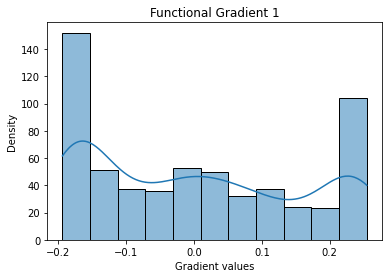

In [10]:
# Functional Gradients - HCPMMP parcellation
ax = sns.histplot(data=func_gm, x="0", kde=True)
ax.set(xlabel='Gradient values', ylabel='Density')
plt.title("Functional Gradient 1")
plt.show()

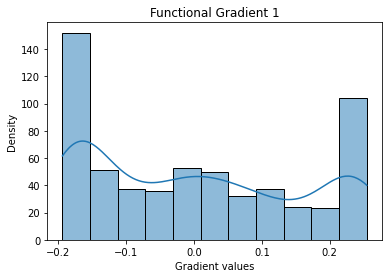

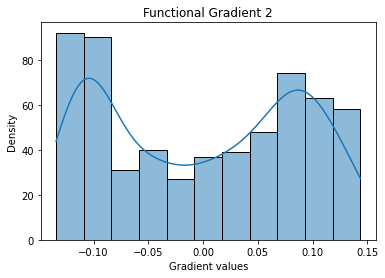

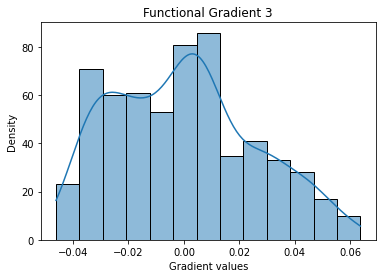

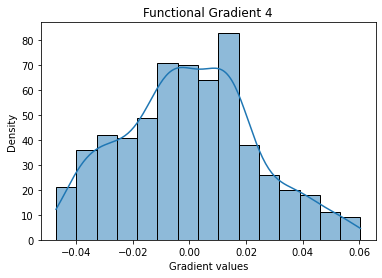

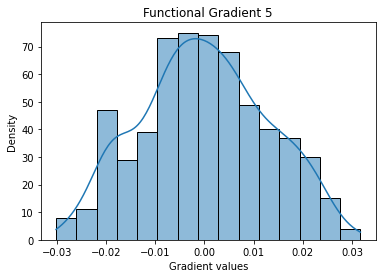

In [11]:
for gradi in range(5):
    ax = sns.histplot(data=func_gm, x=str(gradi), kde=True)
    ax.set(xlabel='Gradient values', ylabel='Density')
    plt.title("Functional Gradient " + str(gradi+1))
    plt.savefig(fig_path + f'Func_HCPMMP_BF_Gradient_histogram_'+ str(gradi+1)+'.png', dpi=300)
    plt.show()

#### Diffusion Gradients

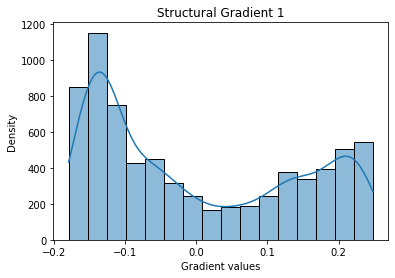

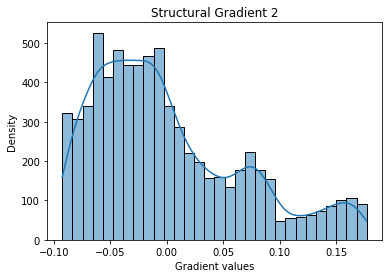

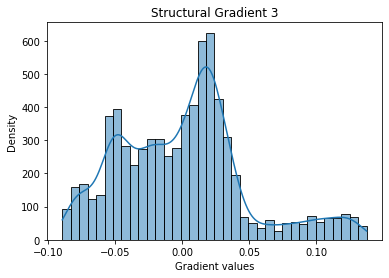

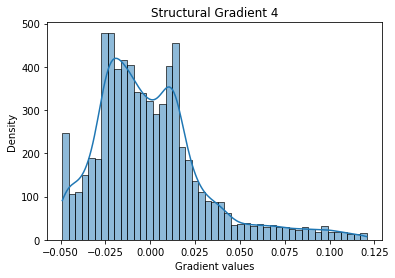

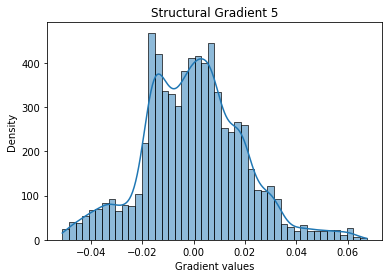

In [12]:
# 7T subjects data
for gradi in range(5):
    ax = sns.histplot(data=diff_gm, x=str(gradi), kde=True)
    ax.set(xlabel='Gradient values', ylabel='Density')
    plt.title("Structural Gradient " + str(gradi+1))
    plt.savefig(fig_path + f'Diff_7Tsubj7TDWI_BF_Gradient_histogram_'+ str(gradi+1)+'.png', dpi=300)
    plt.show()

### Loading BF for color-coding

In [13]:
rfmri_fname = (Func_results_path + 'Func_HCPMMP_gradient_{0}.nii.gz')
hrdmri_fname = (Diff_results_path + 'Diff_7Tsubj7TDWI_gradient_{0}.nii.gz')

In [14]:
rfmri_g1_nii  = nib.load(rfmri_fname.format(0))
hrdmri_g1_nii = nib.load(hrdmri_fname.format(0))

In [15]:
rfmri_g1 = rfmri_g1_nii.get_fdata()
rfmri_mask = np.where(rfmri_g1, 1, 0)

hrdmri_g1  = hrdmri_g1_nii.get_fdata()
hrdmri_mask = np.where(hrdmri_g1, 1, 0)

#### Functional mask color

In [16]:
# Functional mask color
# Get X, Y, Z coordinates
ijk_indices = np.argwhere(rfmri_mask)
ijk_indices = np.hstack((ijk_indices,np.ones((len(ijk_indices),1))))

affine = rfmri_g1_nii.affine

xyz_coords = np.dot(ijk_indices, affine)

In [17]:
# Here we flip along the X axis to give left and right same color codes
new_ijk_indices = ijk_indices.copy()
new_ijk_indices[:,0] = np.abs((rfmri_mask.shape[0]/2)-ijk_indices[:,0])

In [20]:
# Create RGB array
min_max_scaler = preprocessing.MinMaxScaler()

c_rfmri = np.zeros((len(new_ijk_indices),3))
c_rfmri[:,0] = min_max_scaler.fit_transform(new_ijk_indices[:,0][:,np.newaxis])[:,0]
c_rfmri[:,1] = min_max_scaler.fit_transform(new_ijk_indices[:,1][:,np.newaxis])[:,0]
c_rfmri[:,2] = min_max_scaler.fit_transform(new_ijk_indices[:,2][:,np.newaxis])[:,0]

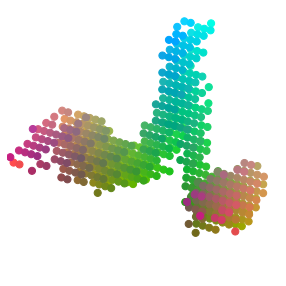

In [21]:
fig = plt.figure(figsize=(10,5))
ax2 = fig.add_subplot(projection='3d')
ax2.dist=6
ax2.set_axis_off()

ax2.scatter(
    ijk_indices[:,0],
    ijk_indices[:,1],
    ijk_indices[:,2],
    s=50, alpha=1,
    c=c_rfmri
)

plt.show()

### BF Functional Gradient correlations

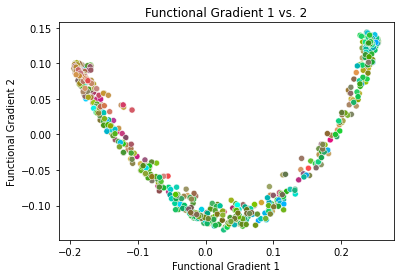

In [22]:
ax = sns.scatterplot(data=func_gm, x="0", y="1", c=c_rfmri)
ax.set(xlabel='Functional Gradient 1', ylabel='Functional Gradient 2')
plt.title("Functional Gradient 1 vs. 2")
plt.show()

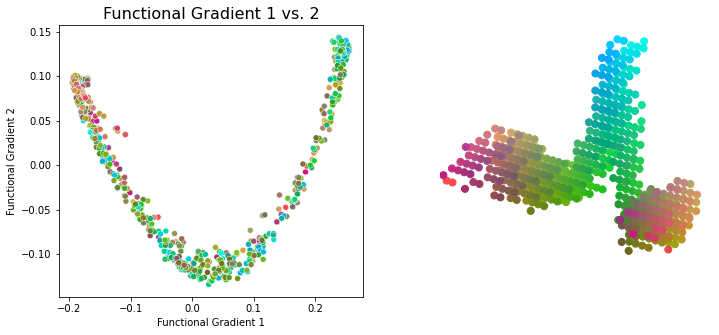

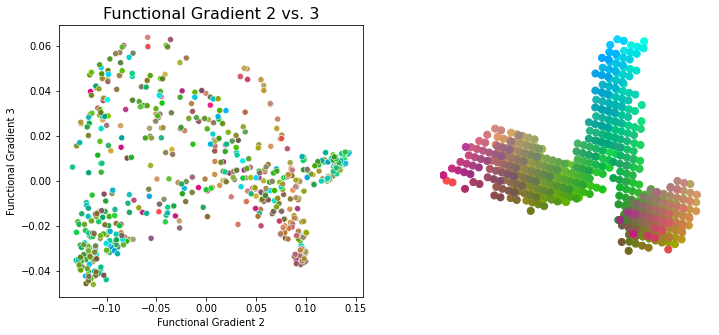

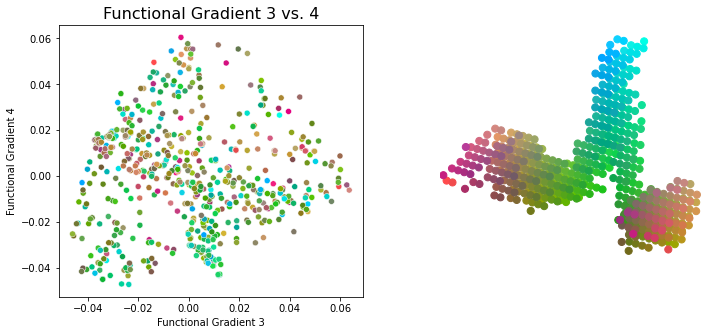

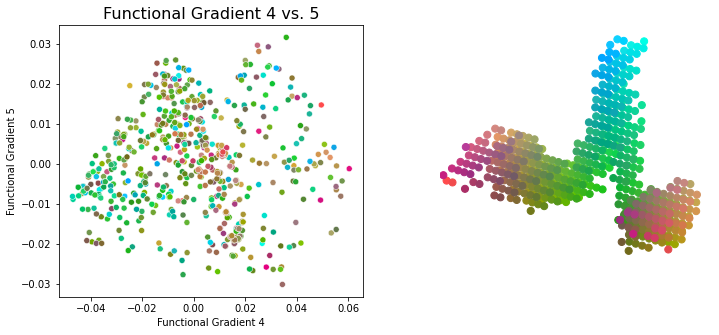

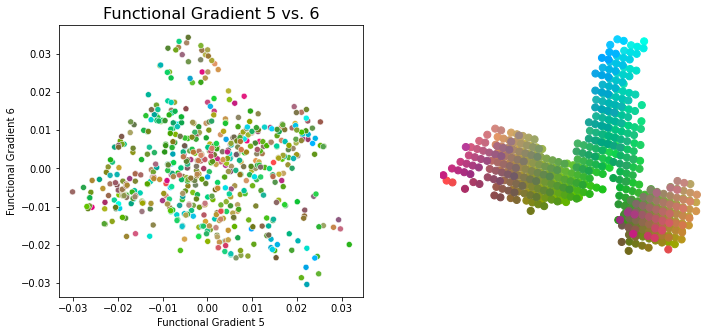

In [23]:
for gradi in range(5):
    fig = plt.figure(figsize=(12,5))
    ax1 = fig.add_subplot(1,2,1)
    ax1 = sns.scatterplot(data=func_gm, x=str(gradi), y=str(gradi+1), c=c_rfmri)
    ax1.set(xlabel='Functional Gradient '+ str(gradi+1), ylabel='Functional Gradient '+ str(gradi+2))
    plt.title("Functional Gradient " + str(gradi+1) + " vs. " + str(gradi+2), fontsize=16)
    ax2 = fig.add_subplot(1,2,2, projection='3d')
    ax2.dist=6
    ax2.set_axis_off()
    ax2.scatter(ijk_indices[:,0],ijk_indices[:,1],ijk_indices[:,2],s=50, alpha=1,c=c_rfmri)
    plt.savefig(fig_path + f'Func_HCPMMP_BF_Gradient_correlation_'+ str(gradi+1)+'_vs_'+ str(gradi+2)+'.png', dpi=300)
    plt.show()

#### Functional gradients - Gradients correlation with gradient distribution

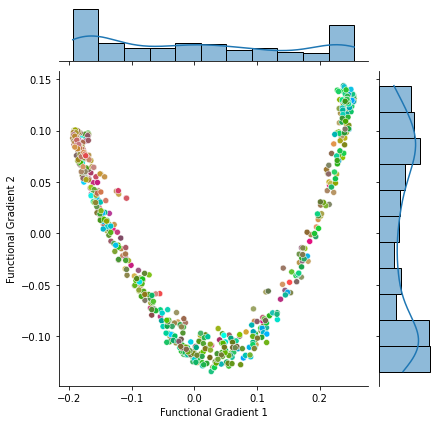

In [24]:
g = sns.JointGrid(data=func_gm, x="0", y="1")
g.plot_joint(sns.scatterplot, c=c_rfmri)
g.plot_marginals(sns.histplot, kde=True)
g.set_axis_labels(xlabel='Functional Gradient 1', ylabel='Functional Gradient 2')

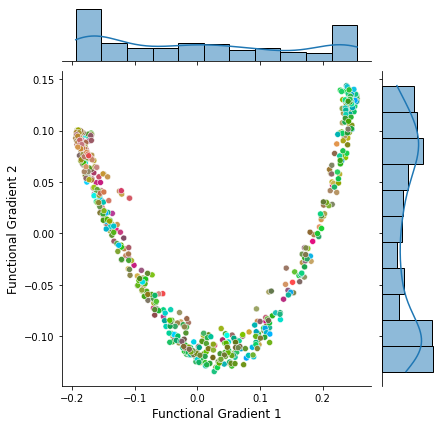

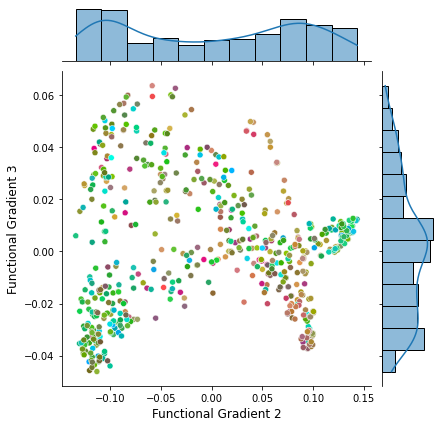

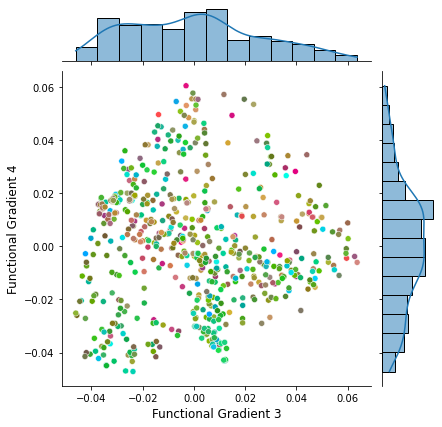

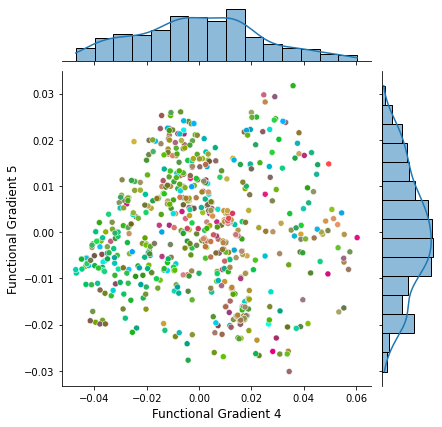

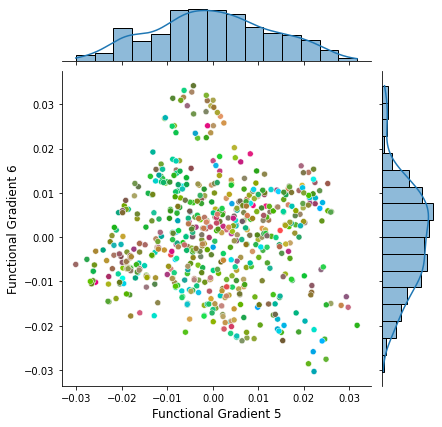

In [25]:
# HCPMMP parcellation
for gradi in range(5):
    g = sns.JointGrid(data=func_gm, x=str(gradi), y=str(gradi+1))
    g.plot_joint(sns.scatterplot, c=c_rfmri)
    g.plot_marginals(sns.histplot, kde=True)
    g.set_axis_labels(xlabel='Functional Gradient '+str(gradi+1), ylabel='Functional Gradient '+str(gradi+2), fontsize=12)
    g.savefig(fig_path + f'Func_HCPMMP_BF_Gradient_correlation_and_distribution_Gradient_'+ str(gradi+1)+'_vs_'+ str(gradi+2)+'.png', dpi=300)

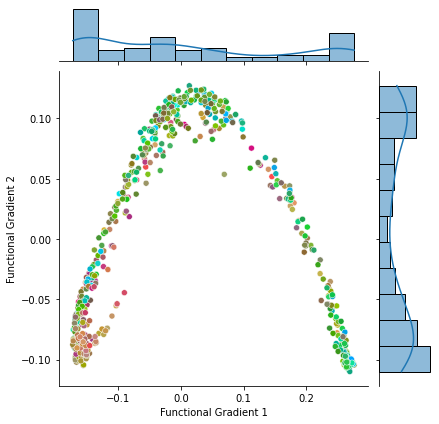

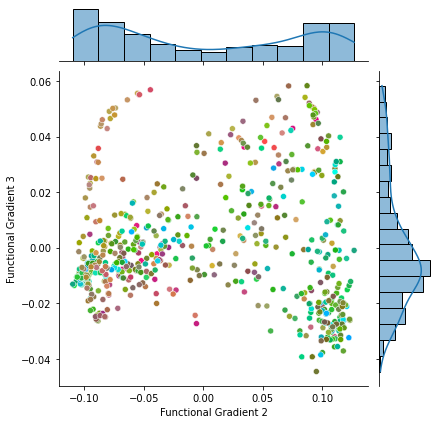

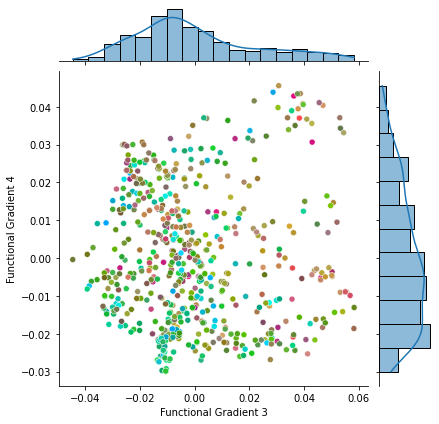

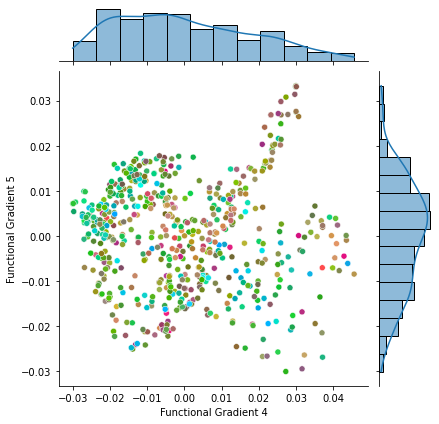

In [26]:
# Schaefer parcellation
for gradi in range(4):
    g = sns.JointGrid(data=Sch_func_gm, x=str(gradi), y=str(gradi+1))
    g.plot_joint(sns.scatterplot, c=c_rfmri)
    g.plot_marginals(sns.histplot, kde=True)
    g.set_axis_labels(xlabel='Functional Gradient '+str(gradi+1), ylabel='Functional Gradient '+str(gradi+2))
    g.savefig(fig_path + f'Func_Schaefer_BF_Gradient_correlation_and_distribution_Gradient_'+ str(gradi+1)+'_vs_'+ str(gradi+2)+'.png', dpi=300)

#### Structural (high-res diffusion) mask color

In [27]:
# Get X, Y, Z coordinates
ijk_indices = np.argwhere(hrdmri_mask)
ijk_indices = np.hstack((ijk_indices,np.ones((len(ijk_indices),1))))

affine = hrdmri_g1_nii.affine

xyz_coords = np.dot(ijk_indices, affine)

In [28]:
# Here we flip along the X axis to give left and right same color codes
new_ijk_indices = ijk_indices.copy()
new_ijk_indices[:,0] = np.abs((hrdmri_mask.shape[0]/2)-ijk_indices[:,0])

In [29]:
# Create RGB array
min_max_scaler = preprocessing.MinMaxScaler()

c_hrdmri = np.zeros((len(new_ijk_indices),3))
c_hrdmri[:,0] = min_max_scaler.fit_transform(new_ijk_indices[:,0][:,np.newaxis])[:,0]
c_hrdmri[:,1] = min_max_scaler.fit_transform(new_ijk_indices[:,1][:,np.newaxis])[:,0]
c_hrdmri[:,2] = min_max_scaler.fit_transform(new_ijk_indices[:,2][:,np.newaxis])[:,0]

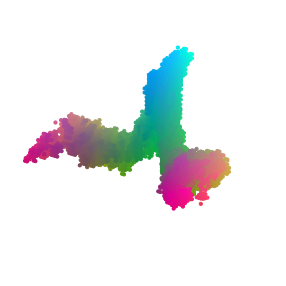

In [30]:
fig = plt.figure(figsize=(10,5))
ax2 = fig.add_subplot(projection='3d')
ax2.dist=8
ax2.set_axis_off()

ax2.scatter(
    ijk_indices[:,0],
    ijk_indices[:,1],
    ijk_indices[:,2],
    s=10, alpha=1,
    c=c_hrdmri
)

plt.show()

### Sructural gradients correlations

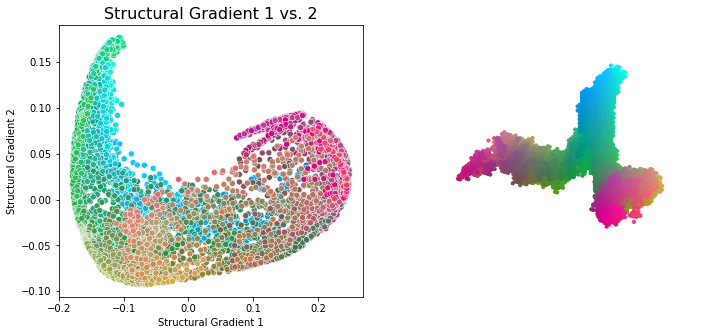

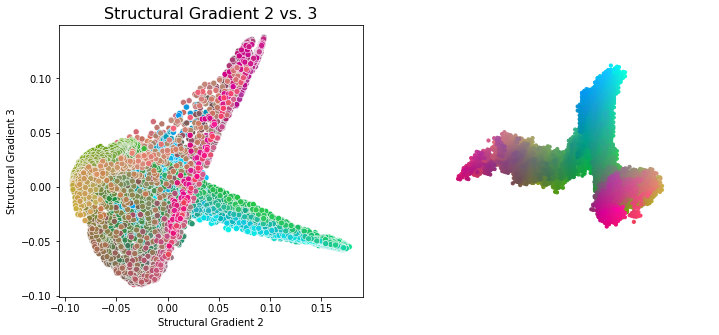

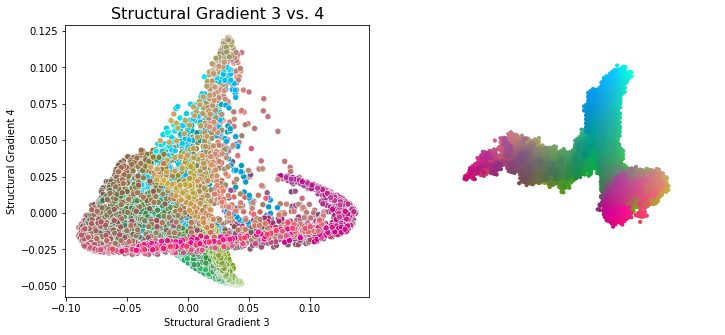

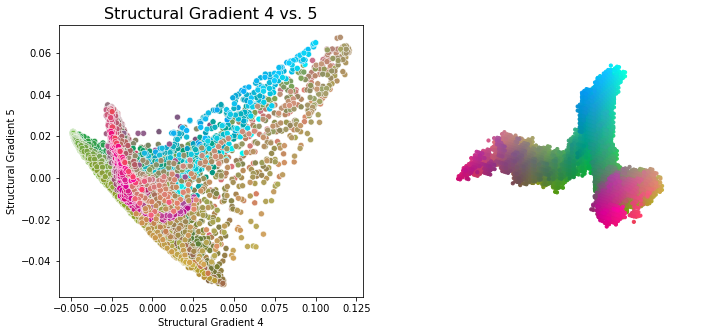

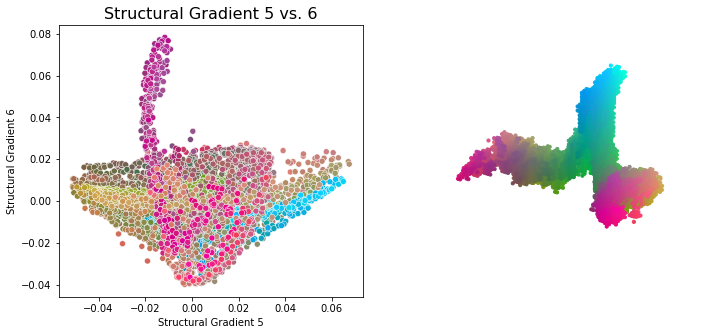

In [31]:
# 7T diffusion data
for gradi in range(5):
    fig = plt.figure(figsize=(12,5))
    ax1 = fig.add_subplot(1,2,1)
    ax1 = sns.scatterplot(data=diff_gm, x=str(gradi), y=str(gradi+1), c=c_hrdmri)
    ax1.set(xlabel='Structural Gradient '+ str(gradi+1), ylabel='Structural Gradient '+ str(gradi+2))
    plt.title("Structural Gradient " + str(gradi+1) + " vs. " + str(gradi+2), fontsize=16)
    ax2 = fig.add_subplot(1,2,2, projection='3d')
    ax2.dist=8
    ax2.set_axis_off()
    ax2.scatter(ijk_indices[:,0],ijk_indices[:,1],ijk_indices[:,2],s=10, alpha=1,c=c_hrdmri)
    plt.savefig(fig_path + f'Diff_7Tsubj7TDWI_BF_Gradient_correlation_'+ str(gradi+1)+'_vs_'+ str(gradi+2)+'.png', dpi=300)
    plt.show()

#### Structural gradients - Gradients correlation with gradient distribution

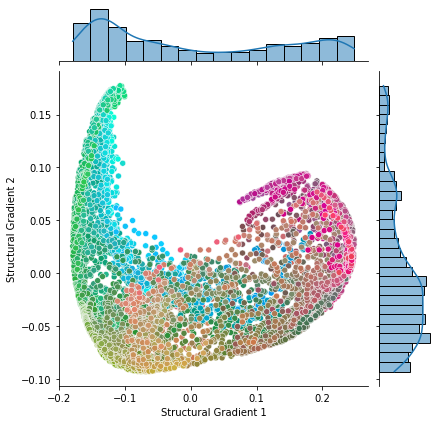

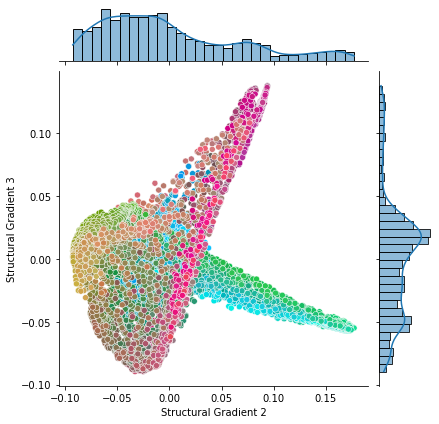

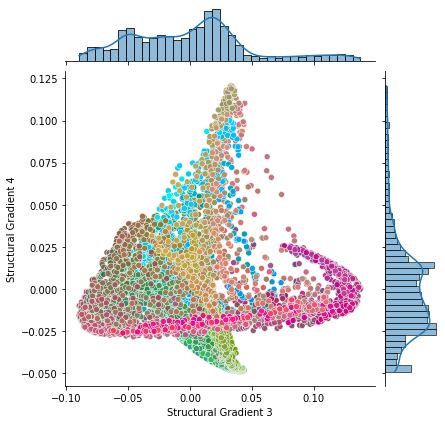

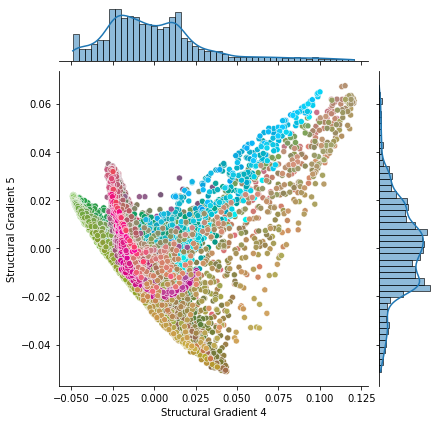

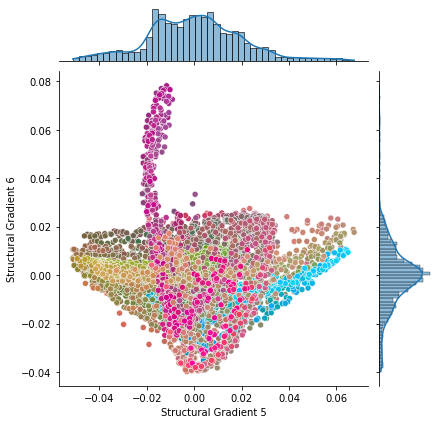

In [32]:
# 7T diffusion data
for gradi in range(5):
    g = sns.JointGrid(data=diff_gm, x=str(gradi), y=str(gradi+1))
    g.plot_joint(sns.scatterplot, c=c_hrdmri)
    g.plot_marginals(sns.histplot, kde=True)
    g.set_axis_labels(xlabel='Structural Gradient '+str(gradi+1), ylabel='Structural Gradient '+str(gradi+2))
    g.savefig(fig_path + f'Diff_7Tsubj7TDWI_BF_Gradient_correlation_and_distribution_Gradient_'+ str(gradi+1)+'_vs_'+ str(gradi+2)+'.png', dpi=300)

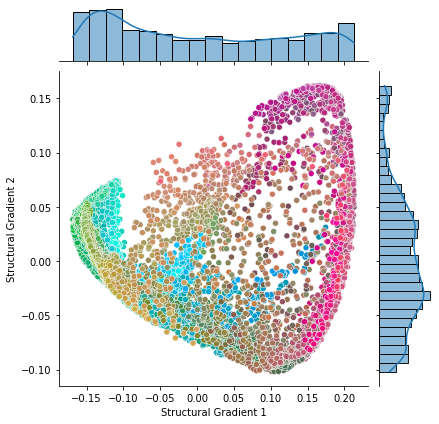

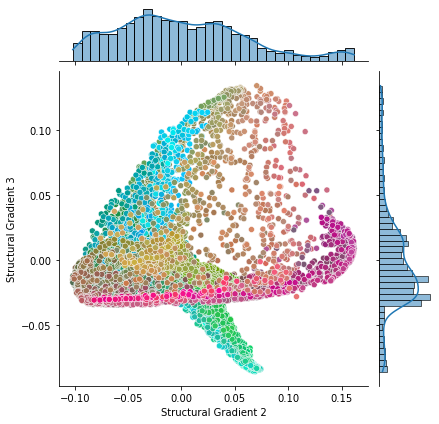

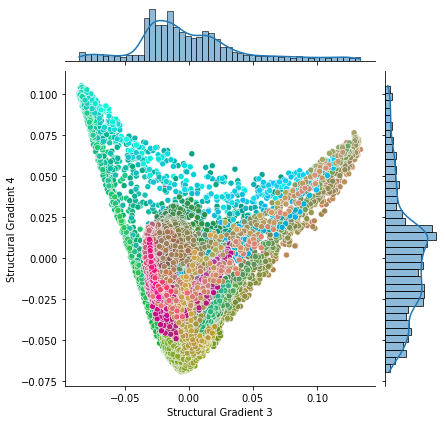

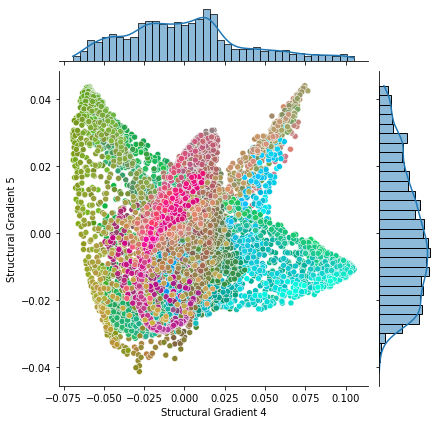

In [33]:
#  UR100 diffusion data
for gradi in range(4):
    g = sns.JointGrid(data=UR100_diff_gm, x=str(gradi), y=str(gradi+1))
    g.plot_joint(sns.scatterplot, c=c_hrdmri)
    g.plot_marginals(sns.histplot, kde=True)
    g.set_axis_labels(xlabel='Structural Gradient '+str(gradi+1), ylabel='Structural Gradient '+str(gradi+2))
    g.savefig(fig_path + f'Diff_UR100_BF_Gradient_correlation_and_distribution_Gradient_'+ str(gradi+1)+'_vs_'+ str(gradi+2)+'.png', dpi=300)